In [329]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision

In [330]:
# train_data = torchvision.datasets.MNIST("./", train=True, download=True)
# test_data = torchvision.datasets.MNIST("./", train=False, download=True)

In [331]:
# train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./
     Split: Train,
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./
     Split: Test)

In [381]:
dataset = torchvision.datasets.MNIST(root='./data', download=True)

In [382]:
x = dataset.data
Y = dataset.targets

In [383]:
class_0 = 0
class_1 = 1

indices = (Y == class_0) | (Y == class_1)
x = x[indices]
Y = Y[indices]

Y = torch.where(Y == class_1, 1, 0)

In [384]:
# X_train.shape, y_train.shape

In [385]:
# x_test = test_data.data
# Y_test = test_data.targets

In [386]:
# X_train.shape, y_train.shape

In [387]:
x.shape

torch.Size([12665, 28, 28])

In [390]:
train_size = 8000
x_train = x[:train_size] /255
Y_train = Y[:train_size]
Y_train = Y[:train_size].unsqueeze(1)

x_test = x[train_size:] /255
Y_test = Y[train_size:]
Y_test = Y[train_size:].unsqueeze(1)

In [391]:
x_train.size()

torch.Size([8000, 28, 28])

In [341]:
# x_test = x_test/ 255
# Y_test = Y_test.unsqueeze(1)

# Sigmoid Activation Function

In [392]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [393]:
def derivative_sigmoid(x):
    return (1-sigmoid(x))*sigmoid(x)

In [394]:
x = torch.linspace(-10, 10, 100)

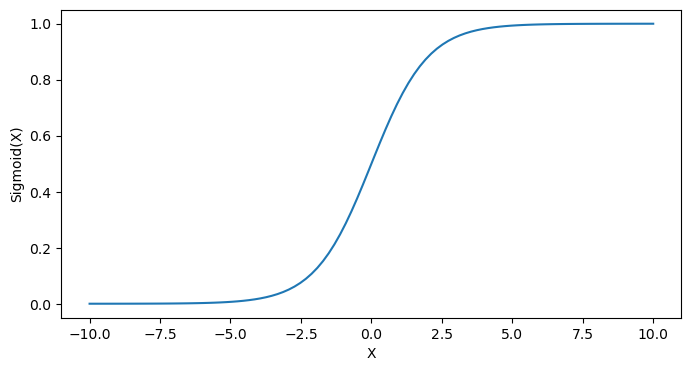

In [395]:
plt.figure(figsize=(8,4))
plt.plot(x, sigmoid(x))
plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.show()

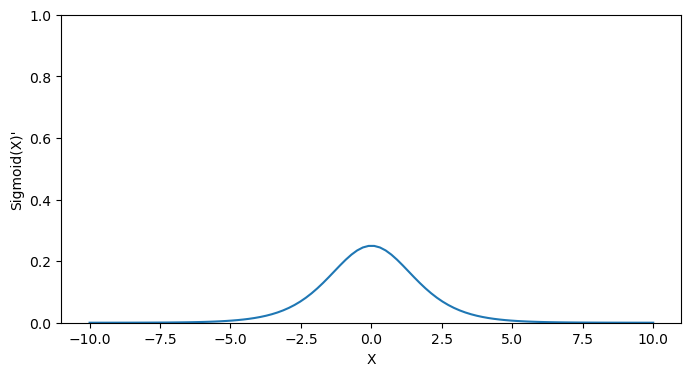

In [396]:
plt.figure(figsize=(8,4))
plt.plot(x, derivative_sigmoid(x))
plt.xlabel('X')
plt.ylabel("Sigmoid(X)'")
plt.ylim(0,1)
plt.show()

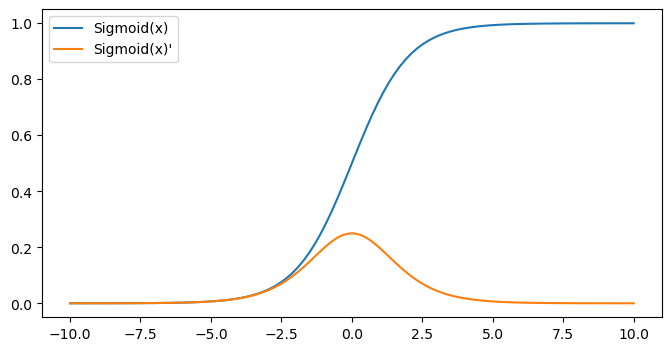

In [397]:
plt.figure(figsize=(8,4))
plt.plot(x, sigmoid(x), label='Sigmoid(x)')
plt.plot(x, derivative_sigmoid(x), label="Sigmoid(x)'")
plt.legend()
plt.show()

 if the input of the sigmoid is really large or really small, the derivative of sigmoid with respect to those particular extreme inputs appraoches 0. At 0, we can already see that the derivative is at its peak and this makes sense since the slope of the tangent line on sigmoid at 0 is the steepest.

In [401]:
alpha = 0.1
losses = []

torch.manual_seed(42)

input_size = 28 * 28
weight = torch.randn(input_size, 1, requires_grad=True) * 0.05
bias = torch.randn(1, 1, requires_grad=True)
epsilon = 1e-10 # If the values of P are too close to 0 or 1, taking the logarithm might lead to NaN values. You can add epsilon value to P to avoid this issue:

for i in range(1000):
    z = x_train.view(-1, input_size) @ weight + bias
    P = sigmoid(z)
    L = -1 * ((Y_train * torch.log(P + epsilon)) + ((1 - Y_train) * torch.log(1 - P + epsilon))).mean()
    losses.append(L.item())

    dL_dL = torch.ones_like(L)
    dL_dP = -( 1 / y_train.shape[0]) * ((Y_train/P) + ((1 - Y_train)/(1 - P)))
    dL_dZ = P - Y_train
    dL_dW = x_train.view(-1, input_size).T @ dL_dZ
    dL_dB = dL_dZ.sum(dim=0, keepdim=True)
    with torch.no_grad():
        weight -= alpha * dL_dW
        bias -= alpha * dL_dB  # Fixed typo in bias update


In [402]:
losses

[0.6869704723358154,
 0.12666021287441254,
 0.11394419521093369,
 0.1107829362154007,
 0.10762566328048706,
 0.0982872024178505,
 0.09412474930286407,
 0.09300781786441803,
 0.09093142300844193,
 0.08928216993808746,
 0.0892246812582016,
 0.08921191841363907,
 0.08410944789648056,
 0.08321654796600342,
 0.083205446600914,
 0.07995115220546722,
 0.07799917459487915,
 0.0781390443444252,
 0.07827699929475784,
 0.07783499360084534,
 0.07354708015918732,
 0.06996022164821625,
 0.06981232762336731,
 0.07000145316123962,
 0.06883267313241959,
 0.06587914377450943,
 0.06401926279067993,
 0.0625893622636795,
 0.06258326768875122,
 0.06255286931991577,
 0.06252238154411316,
 0.06170506030321121,
 0.05996406078338623,
 0.059568412601947784,
 0.05986298248171806,
 0.060147516429424286,
 0.06036240607500076,
 0.06043268367648125,
 0.060441866517066956,
 0.060442764312028885,
 0.06044285371899605,
 0.05777592957019806,
 0.05806616693735123,
 0.0579659603536129,
 0.05682992562651634,
 0.056158419698

In [404]:
y_train.shape

torch.Size([12665, 1])

In [405]:
dL_dZ.shape

torch.Size([8000, 1])

In [406]:
dL_dP.shape

torch.Size([8000, 1])

In [407]:
L.shape

torch.Size([])

In [408]:
P.shape

torch.Size([8000, 1])

In [409]:
z.shape

torch.Size([8000, 1])

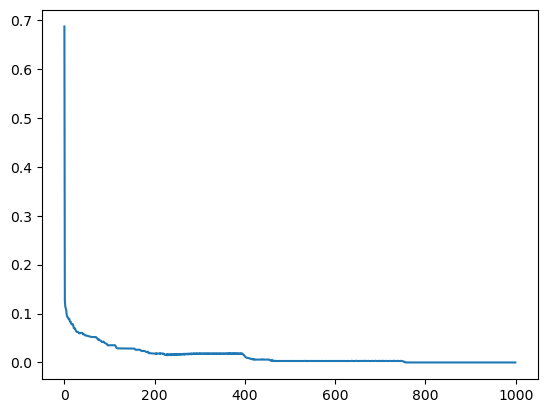

In [410]:
plt.plot(losses)

In [412]:

Z1 = x_test.view(-1, input_size) @ weight + bias
P1 = sigmoid(Z1)

true_values = torch.where(Y_test == 1, class_1, class_0)
preds = torch.where(P1 > 0.5, class_1, class_0)

score = torch.sum(preds == true_values) / Y_test.shape[0]
score

tensor(0.9989)